# Chapter 05 
 Machine Learning for Business Analytics<br>
Concepts, Techniques, and Applications in Python<br>
by Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

Publisher: Wiley; 2nd edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Galit Shmueli, Peter C. Bruce, Peter Gedeck, Nitin R. Patel

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors.
"Warnings" are for information only and can usually be ignored.
"Errors" will stop execution and need to be fixed in order to get results.

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [2]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
import mlba
%matplotlib inline

In [3]:
# Load data frame and reduce it to 1000 rows for regression analysis
car_df = mlba.load_data('ToyotaCorolla.csv')
car_df = car_df.iloc[0:1000]

# create a list of predictor variables by removing output variables and text columns
excludeColumns = ('Price', 'Id', 'Model', 'Fuel_Type', 'Color')
predictors = [column for column in car_df.columns if column not in excludeColumns]
outcome = 'Price'

# partition data
X = car_df[predictors]
y = car_df[outcome]
train_X, holdout_X, train_y, holdout_y = train_test_split(X, y, test_size=0.4,
                                                          random_state=1)

# train linear regression model
reg = LinearRegression()
reg.fit(train_X, train_y)

# evaluate performance
# training
mlba.regressionSummary(y_true=train_y, y_pred=reg.predict(train_X))
# holdout
mlba.regressionSummary(y_true=holdout_y, y_pred=reg.predict(holdout_X))


Regression statistics

Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 1136.9036
Mean Absolute Error (MAE) : 845.2296
Mean Percentage Error (MPE) : -0.8266
Mean Absolute Percentage Error (MAPE) : 7.5777

Regression statistics

Mean Error (ME) : 139.9154
Root Mean Squared Error (RMSE) : 1152.7140
Mean Absolute Error (MAE) : 892.8933
Mean Percentage Error (MPE) : 0.3309
Mean Absolute Percentage Error (MAPE) : 8.0439


 
The expression `[column for column in car_df.columns if column not in excludeColumns]` is a so-called list comprehension. It is a compact way to create a list from another list, with the condition that the element is not in the list of excluded columns. The way to read it is:
> for each column name in the list of column names, 
>     if column is not in the list of excluded columns, include it in the new list. 

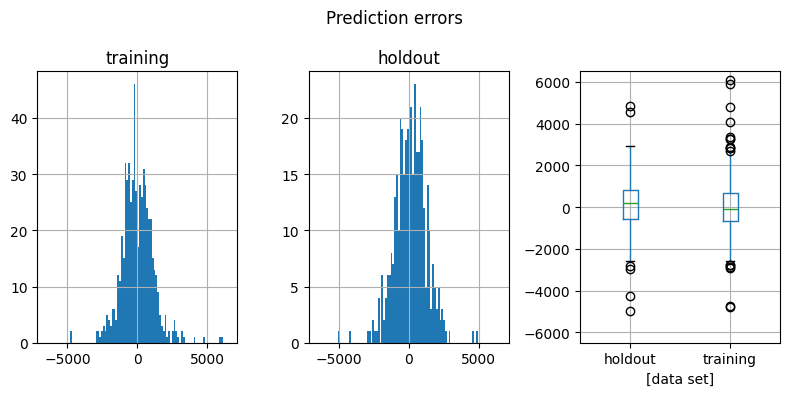

In [4]:
pred_error_train = pd.DataFrame({
    'residual': train_y - reg.predict(train_X),
    'data set': 'training'
})
pred_error_holdout = pd.DataFrame({
    'residual': holdout_y - reg.predict(holdout_X),
    'data set': 'holdout'
})
boxdata_df = pd.concat([pred_error_train, pred_error_holdout])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
common = {'bins': 100, 'range': [-6500, 6500]}
pred_error_train.hist(ax=axes[0], **common)
pred_error_holdout.hist(ax=axes[1], **common)
boxdata_df.boxplot(ax=axes[2], by='data set')

axes[0].set_title('training')
axes[1].set_title('holdout')
axes[2].set_title(' ')
axes[2].set_ylim(-6500, 6500)
plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.tight_layout()
plt.show()

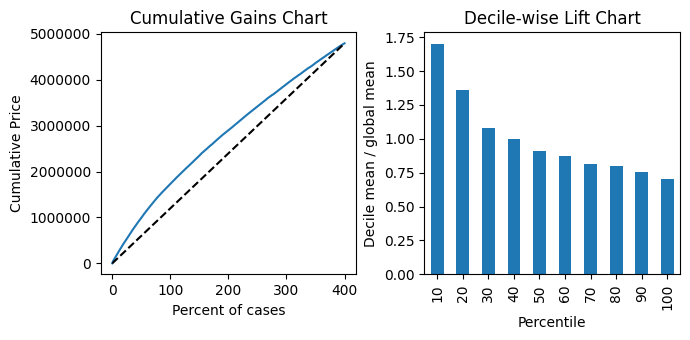

In [5]:
# sort the actual values in descending order of the prediction
df = pd.DataFrame({'predicted': reg.predict(holdout_X),
                   'actual': holdout_y})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3.5))
ax = mlba.gainsChart(df, ranking='predicted', actual='actual', type='regression',
                     ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.ticklabel_format(style='plain')

mlba.liftChart(df, ranking='predicted', actual='actual', ax=axes[1], labelBars=False)
plt.tight_layout()
plt.show()

In [6]:
print(f'Number of cars: {len(df)}')
n = round(len(df) * 0.1)
print(f'Number of 10% of the cars: {n}')
average_10 = df['actual'].sum() * 0.1
print(f'Average sales price of 10% random cars: {average_10:.0f}')
# rank sales by predicted value (reverse order)
df = df.sort_values(by=['predicted'], ascending=False)
df['total'] = df['actual'].cumsum()
ranked_10 = df.iloc[n-1]['total']
print(f'Sale price of ranked 10%: {ranked_10:.0f}')
print(f'Ratio: {ranked_10 / average_10:.2f}')

Number of cars: 400
Number of 10% of the cars: 40
Average sales price of 10% random cars: 479411
Sale price of ranked 10%: 815569
Ratio: 1.70


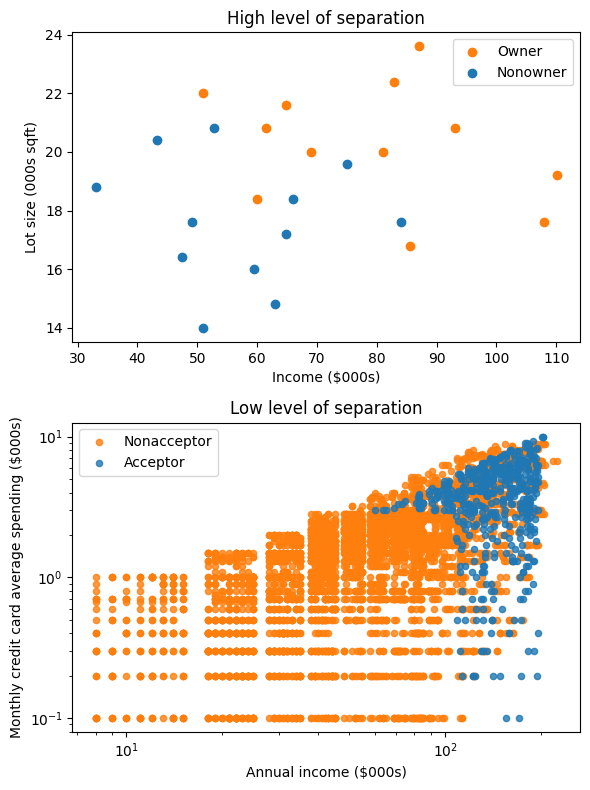

In [7]:
mower_df = mlba.load_data('RidingMowers.csv')
universal_df = mlba.load_data('UniversalBank.csv')

fig, axes = plt.subplots(figsize=(6, 8), nrows=2)
ax=axes[0]
subset = mower_df.loc[mower_df['Ownership']=='Owner']
ax.scatter(subset.Income, subset.Lot_Size, marker='o',
    label='Owner', color='C1')
subset = mower_df.loc[mower_df['Ownership']=='Nonowner']
ax.scatter(subset.Income, subset.Lot_Size, marker='o',
    label='Nonowner', color='C0')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Lot size (000s sqft)')
ax.set_title('High level of separation')
ax.legend()

ax = axes[1]
subset = universal_df.loc[universal_df['Personal Loan'] == 0]
subset.plot.scatter(x='Income', y='CCAvg', ax=ax, alpha=0.8,
                    color='C1', label='Nonacceptor')
subset = universal_df.loc[universal_df['Personal Loan'] == 1]
subset.plot.scatter(x='Income', y='CCAvg', ax=ax, alpha=0.8,
                    color='C0', label='Acceptor')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Annual income ($000s)')
ax.set_ylabel('Monthly credit card average spending ($000s)')
ax.set_title('Low level of separation')
ax.legend()
plt.tight_layout()
plt.show()

In [8]:
owner_df = mlba.load_data('ownerExample.csv')

## cutoff = 0.5
predicted = ['owner' if p > 0.5 else 'nonowner' for p in owner_df.Probability]
mlba.classificationSummary(y_true=owner_df.Class, y_pred=predicted)

Confusion Matrix (Accuracy 0.8750)

         Prediction
  Actual nonowner    owner
nonowner       10        2
   owner        1       11


In [9]:
## cutoff = 0.25
predicted = ['owner' if p > 0.25 else 'nonowner' for p in owner_df.Probability]
mlba.classificationSummary(y_true=owner_df.Class, y_pred=predicted)

Confusion Matrix (Accuracy 0.7917)

         Prediction
  Actual nonowner    owner
nonowner        8        4
   owner        1       11


In [10]:
## cutoff = 0.75
predicted = ['owner' if p > 0.75 else 'nonowner' for p in owner_df.Probability]
mlba.classificationSummary(y_true=owner_df.Class, y_pred=predicted)

Confusion Matrix (Accuracy 0.7500)

         Prediction
  Actual nonowner    owner
nonowner       11        1
   owner        5        7


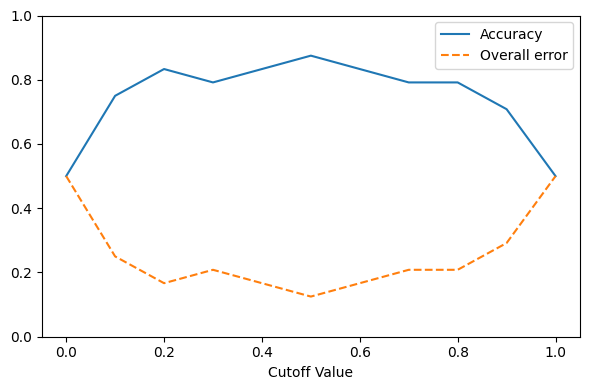

In [11]:
df = mlba.load_data('liftExample.csv')

cutoffs = [i * 0.1 for i in range(0, 11)]
accT = []
for cutoff in cutoffs:
    predicted = [1 if p > cutoff else 0 for p in df.prob]
    accT.append(accuracy_score(df.actual, predicted))

fig, ax = plt.subplots()
fig.set_size_inches(6, 4)
ax.plot(cutoffs, accT, '-', label='Accuracy')
ax.plot(cutoffs, [1 - acc for acc in accT], '--', label='Overall error')
ax.set_ylim(0, 1)
ax.set_xlabel('Cutoff Value')
ax.legend()
plt.tight_layout()
plt.show()

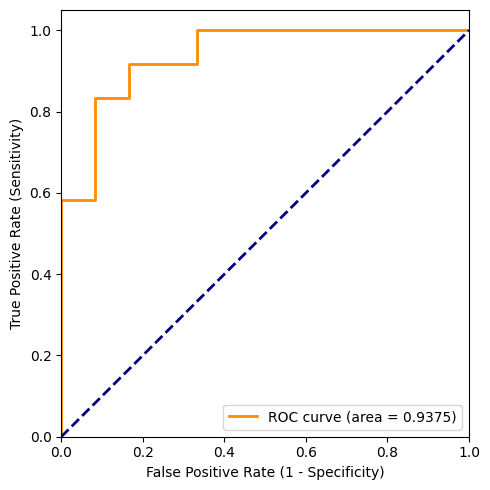

In [12]:
from sklearn.metrics import roc_curve, auc

# compute ROC curve and AUC
fpr, tpr, _ = roc_curve(df.actual, df.prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label=f'ROC curve (area = {roc_auc:0.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

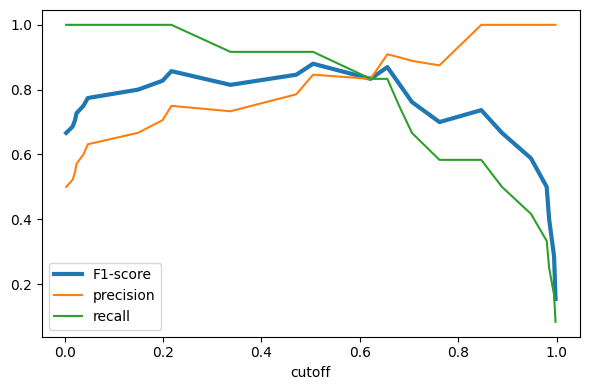

In [13]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
df = mlba.load_data('liftExample.csv')

metrics = []
cutoffs = np.arange(0, 1, 0.05)
cutoffs = sorted(df['prob'].unique())
for cutoff in cutoffs:
    df['predicted'] = [1 if p >= cutoff else 0 for p in df['prob']]
    precision, recall, fscore, _ = precision_recall_fscore_support(
        y_true=df['actual'], y_pred=df['predicted'], zero_division=np.nan)
    metrics.append({
        'cutoff': cutoff,
        'precision': precision[1],
        'recall': recall[1],
        'F1-score': fscore[1],
    })
metrics = pd.DataFrame(metrics)
fig, ax = plt.subplots(figsize=[6, 4])
metrics.plot(x='cutoff', y='F1-score', ax=ax, linewidth=3)
metrics.plot(x='cutoff', y='precision', ax=ax)
metrics.plot(x='cutoff', y='recall', ax=ax)
plt.tight_layout()
plt.show()

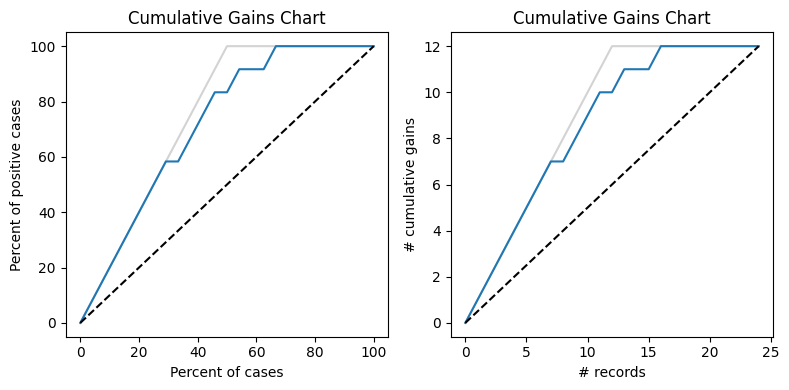

In [14]:
df = mlba.load_data('liftExample.csv')
fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
mlba.gainsChart(df, ranking='prob', actual='actual', ax=axes[0])
mlba.gainsChart(df, ranking='prob', actual='actual', show_counts=True, ax=axes[1])
plt.tight_layout()
plt.show()

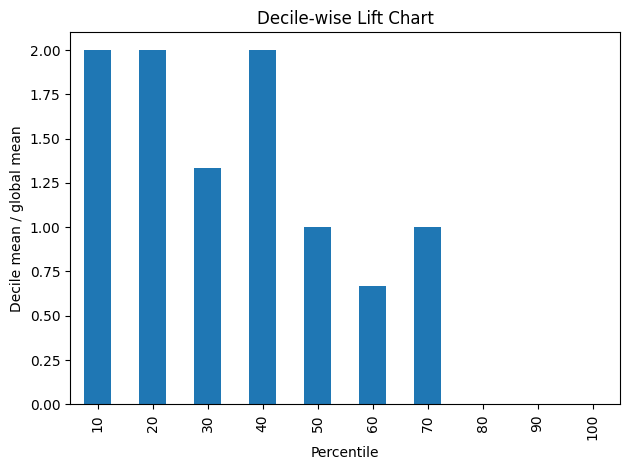

In [15]:
mlba.liftChart(df, ranking='prob', actual='actual', labelBars=False)
plt.tight_layout()
plt.show()